In [1]:
from scipy.ndimage import correlate
from skimage import io
import numpy as np

In [2]:
input_img = np.arange(25).reshape(5, 5)
print(input_img)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [3]:
weights = [[0, 1, 0],
		   [1, 2, 1],
		   [0, 1, 0]]


In [4]:
res_img = correlate(input_img, weights)
res_img

array([[  6,  11,  17,  23,  28],
       [ 31,  36,  42,  48,  53],
       [ 61,  66,  72,  78,  83],
       [ 91,  96, 102, 108, 113],
       [116, 121, 127, 133, 138]])

### Exercise 1
Print the value in position (3, 3) in res_img. Explain the value?

In [5]:
res_img[3,3]

108

The value is the result of the dot product between the filter and the overlapping "pixel" values of our input image, in this case:
12 * 0 + 1 * 13 + 0 * 14 (vector 1) + 17 * 1 + 18 * 2 + 19 * 1 (vector 2) + 22 * 0 + 23 * 1 + 24 * 0

In [6]:
12*0+1*13+0*14+17*1+18*2+19*1+22*0+23*1+24*0

108

### Exercuse 2 : Border handling
When the value of an output pixel at the boundary of the image is computed, a portion of the filter is usually outside the edge of the input image. One way to handle this, is to assume that the value of the off-the-edge pixels of the image are 0. This is called zero padding. Since 0 is the value of a black pixel, the output image will have a dark edge. Another approach is to reflect the actual pixel values of the image to the off-the-edge-pixel. This is the default behaviour of correlate. We can also set the off-the-edge-pixel to have a constant value (for example 10) by:

In [7]:
#With constant border, value 10
res_img = correlate(input_img, weights, mode="constant", cval=10)
res_img

array([[ 26,  20,  25,  30,  40],
       [ 36,  36,  42,  48,  54],
       [ 61,  66,  72,  78,  79],
       [ 86,  96, 102, 108, 104],
       [ 96, 110, 115, 120, 110]])

In [8]:
#With reflection (default)
res_img = correlate(input_img, weights , mode="reflect")
res_img

array([[  6,  11,  17,  23,  28],
       [ 31,  36,  42,  48,  53],
       [ 61,  66,  72,  78,  83],
       [ 91,  96, 102, 108, 113],
       [116, 121, 127, 133, 138]])

As expected, the difference between constant / reflect mode is seen at the border pixels since we are using a 3x3 filter only the outmost pixels are affected by the pixel values "outside" our borders. Had we used a 4x4 filter, also the 2. row/columns from the edge would have been affected. 

### Exercise 3: Mean filtering
Now we will try some filters on an artificial image with different types of noise starting with the mean filter.

Create a mean filter with normalized weights:

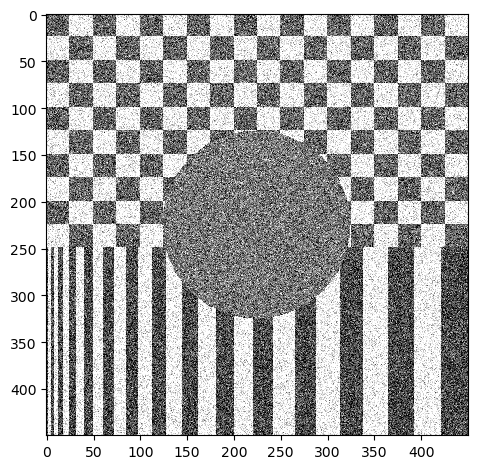

In [9]:
data_dir = "./data/"
img_name = "Gaussian.png"
img_orig = io.imread(data_dir + img_name)
io.imshow(img_orig)

In [12]:
filter_size = 5
filter_weights = np.ones((filter_size, filter_size))
#normalize weights
filter_weights = filter_weights / np.sum(filter_weights)


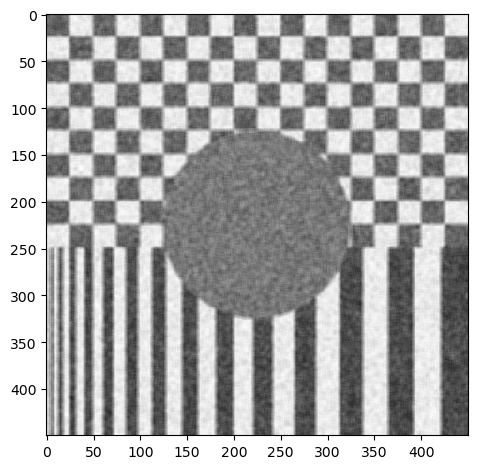

In [14]:
res_img = correlate(img_orig, filter_weights , mode="reflect")
io.imshow(res_img)

Use correlate with the Gaussian.png image and the mean filter. Show the resulting image together with the input image. What do you observe?

Try to change the size of the filter to 10, 20, 40 etc.. What do you see?

What happens to the noise and what happens to the places in image where there are transitions from light to dark areas?

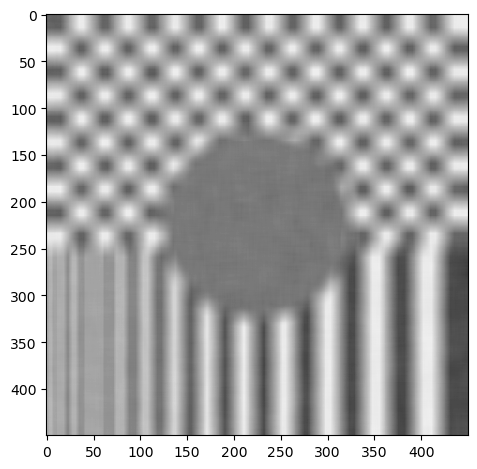

In [16]:
filter_size = 20
filter_weights = np.ones((filter_size, filter_size))
#normalize weights
filter_weights = filter_weights / np.sum(filter_weights)
res_img = correlate(img_orig, filter_weights , mode="reflect")
io.imshow(res_img)


Increasing the filter size effeciently removes the noise, but also blurs the entire picture in the areas where there is a transition from light to dark it becomes a grey-scale gradient.

### Exercise 4: Median filtering
Median filtering
The median filter belongs to the group of rank filters where the pixel values in a given area are sorted by value and then one of the values are picked. Here the median value of the sorted values

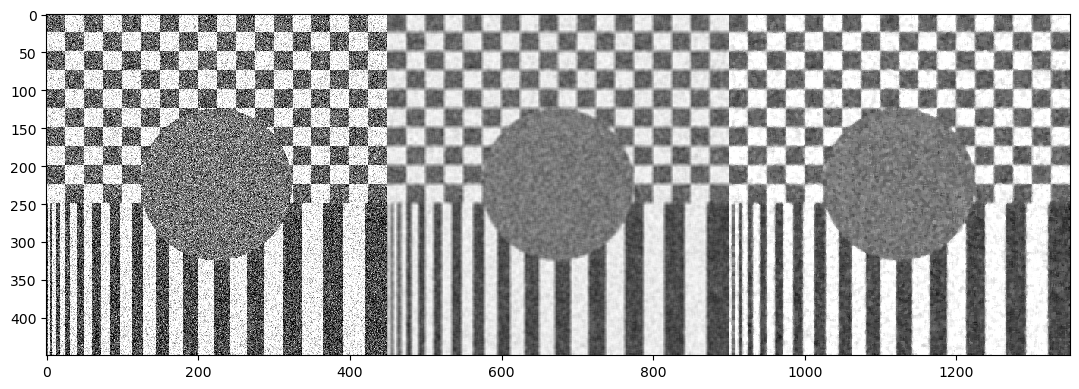

In [35]:
from skimage import filters
from matplotlib import pyplot as plt


size = 5
footprint = np.ones([size, size])
med_img = filters.median(img_orig, footprint)

filter_weights = np.ones((size, size))
#normalize weights
filter_weights = filter_weights / np.sum(filter_weights)
mean_img = correlate(img_orig, filter_weights , mode="reflect")

#Show the original image, med_img and mean filtering with similar size filter, next to one another
#increase the size of the imshow window
plt.figure(figsize = (20,4))
io.imshow(np.hstack((img_orig, mean_img, med_img)))


As seen in the comparison, median rank filtering does a better job at removing noise, without blurring the image as much as the mean filtering does.
However, at larger filter size values, the blurring of the median rank filter also becomes clear as seen below:

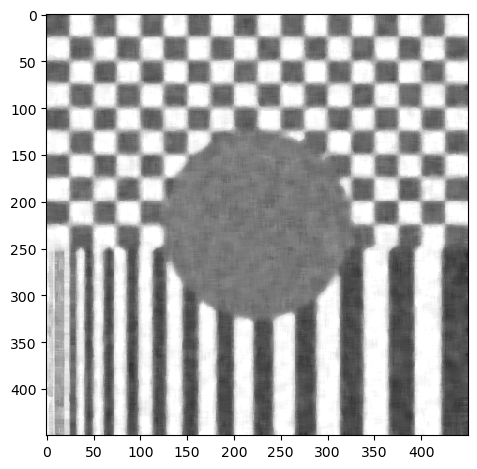

In [29]:
from skimage import filters
size = 10
footprint = np.ones([size, size])
med_img = filters.median(img_orig, footprint)
io.imshow(med_img)

### Exercise 5: Comparing mean and median (ups already did)
Try to use your mean and median filter with different filter sizes on the SaltPepper.png. What do you observe? Can they remove the noise and what happens to the image?

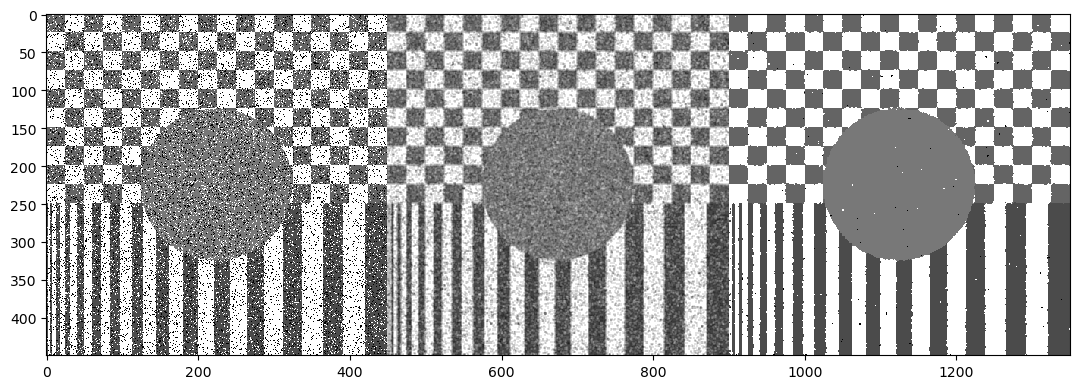

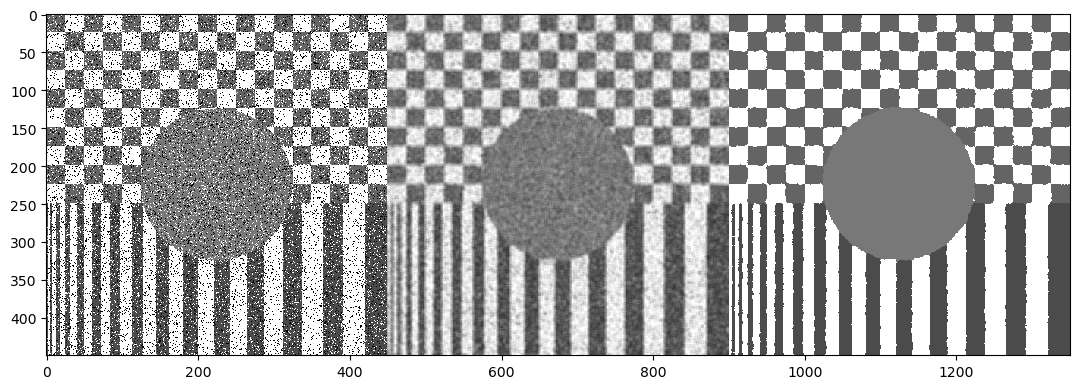

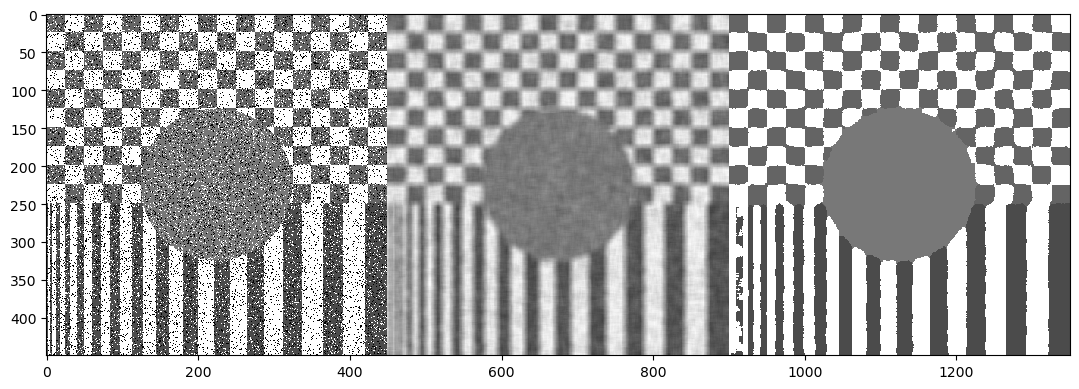

In [38]:
img_name = "SaltPepper.png"
img_orig = io.imread(data_dir + img_name)

size = [3,5,10]
for s in size:
    footprint = np.ones([s, s])
    med_img = filters.median(img_orig, footprint)
    

    filter_mean = np.ones((s, s))
    filter_mean = filter_mean / np.sum(filter_mean)
    mean_img = correlate(img_orig, filter_mean , mode="reflect")

    #Show the original image, med_img and mean filtering with similar size filter, next to one another
    #increase the size of the imshow window
    plt.figure(figsize = (20,4))
    io.imshow(np.hstack((img_orig, mean_img, med_img)))


Mean does little good, mostly blurs the image and as such "somewhat' removes the salt and pepper, median with small filter sizes does a good job at removing and cleaning the image but at too large filters make the shapes melt together.

### Exercise 6: Gaussian filters
The Gaussian filter is widely used in image processing. It is a smoothing filter that removes high frequencies from the image.

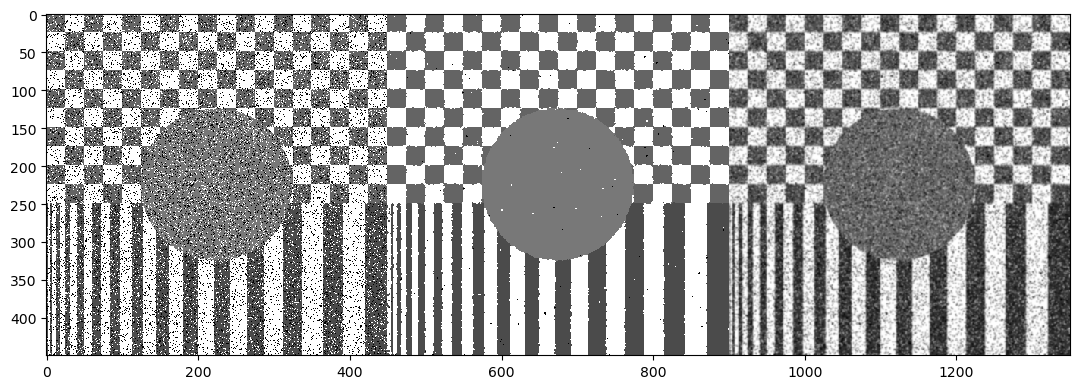

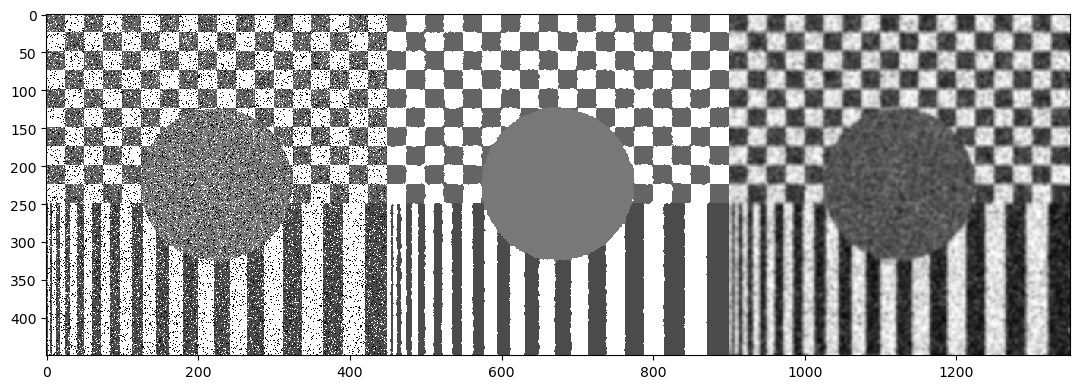

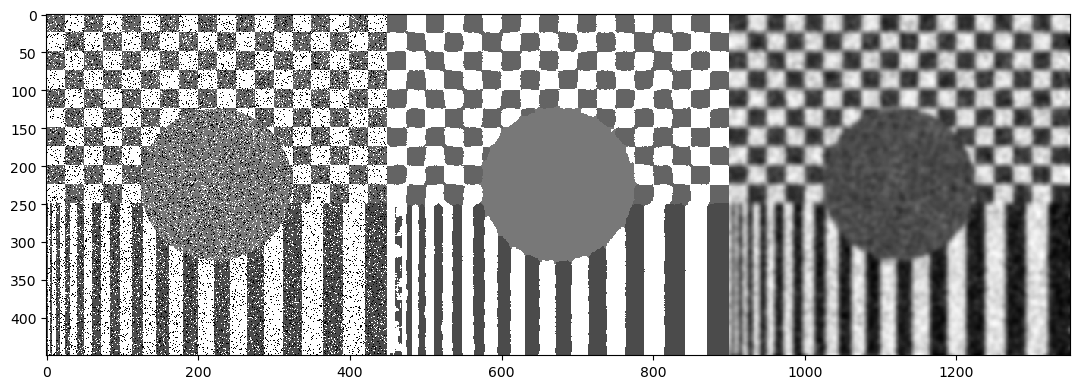

In [63]:
img_name = "SaltPepper.png"
img_orig = io.imread(data_dir + img_name)

size = [3,5,10]
sigma = [1,2,3]
#Iterate through the filter size (size) and sigma (sigma) in order to plot the original image, the median filtering and the gaus filtering next to one another with varying values 

for s in zip(size, sigma):
    gauss_img = filters.gaussian(img_orig, s[1])
    #Gaus returns floating normalized values, so to plot alongside the other images we need to map the values to the range [0,255]
    gauss_img = (gauss_img - np.min(gauss_img)) / (np.max(gauss_img) - np.min(gauss_img)) * 255
    #And then transform from float to uint8
    gauss_img = gauss_img.astype(np.uint8)

    footprint = np.ones([s[0], s[0]])
    med_img = filters.median(img_orig, footprint)

    #increase the size of the imshow window
    plt.figure(figsize = (20,4))
    io.imshow(np.hstack((img_orig, med_img, gauss_img)))


The gausian filter does a poor job at removing noise, but as it does focus on removing high freq pixel values it can be seen that the white salt and pepper noise is removed to some extend, but at large sigmas the entire image is darkened as an effect.

### Exercise 7
Use one of your images (or use the car.png image) to try the above filters. Especially, try with large filter kernels (larger than 10) with the median and the Gaussian filter. Remember to transform your image into gray-scale before filtering.

What is the visual difference between in the output? Try to observe places where there is clear light-dark transition.

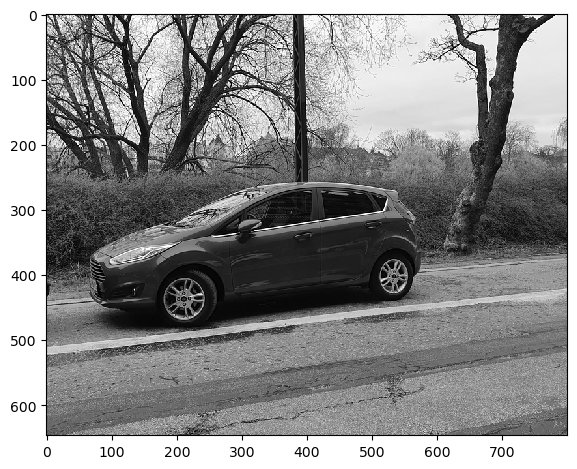

In [72]:
from skimage.color import rgb2gray

img_name = "car.png"
img_orig = io.imread(data_dir + img_name)
io.imshow(img_orig)
#Transform to grayscale using skimage
img_gray = rgb2gray(img_orig)
io.imshow(img_gray)

In [74]:
#print first 5 pixels of the img_grey
print(img_gray[0:5,0])
#Transform to uint8
img_gray = (img_gray * 255).astype(np.uint8)
print(img_gray[0:5,0])


[0.15869294 0.39601882 0.90561451 0.86611608 0.83250353]
[ 40 100 230 220 212]


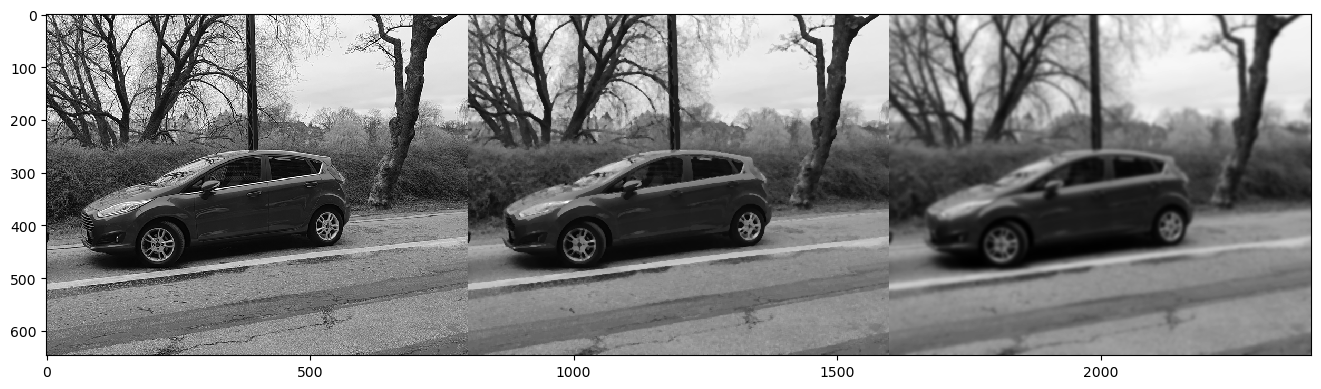

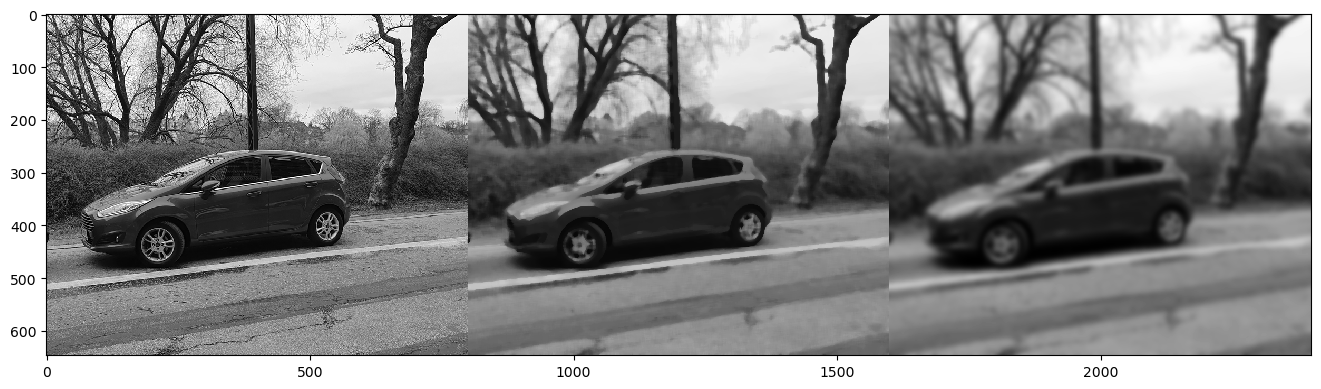

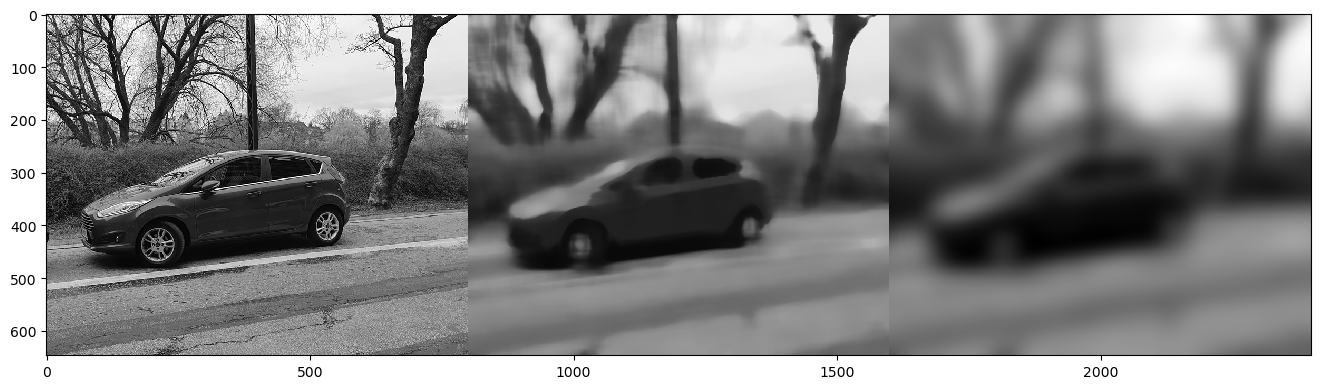

In [82]:
size = [5,10,30]
sigma = [3,5,20]
#Iterate through the filter size (size) and sigma (sigma) in order to plot the original image, the median filtering and the gaus filtering next to one another with varying values 

for s in zip(size, sigma):
    gauss_img = filters.gaussian(img_gray, s[1])
    #Gaus returns floating normalized values, so to plot alongside the other images we need to map the values to the range [0,255]
    gauss_img = (gauss_img - np.min(gauss_img)) / (np.max(gauss_img) - np.min(gauss_img)) * 255
    #And then transform from float to uint8
    gauss_img = gauss_img.astype(np.uint8)

    footprint = np.ones([s[0], s[0]])
    med_img = filters.median(img_gray, footprint)

    #increase the size of the imshow window
    plt.figure(figsize = (20,4))
    io.imshow(np.hstack((img_gray, med_img, gauss_img)))

Median filter makes very clear cut lines between dark and light, whereas gausing makes smother and more blurry transitions between.

### Exercise 8: Edge filter
In image analysis, an edge is where there is a large transition from light pixels to dark pixels. It means that there is a high pixel value gradient at an edge. Since objects in an image are often of a different color than the background, the outline of the object can sometimes be found where there are edges in the image. It is therefore interesting to apply filters that can estimate the gradients in the image and using them to detect edges.

Try to filter the donald_1.png photo with the prewitt_h and prewitt_v filters and show the output without converting the output to unsigned byte. Notice that the output range is [-1, 1]. Try to explain what features of the image that gets high and low values when using the two filters?

In [83]:
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt

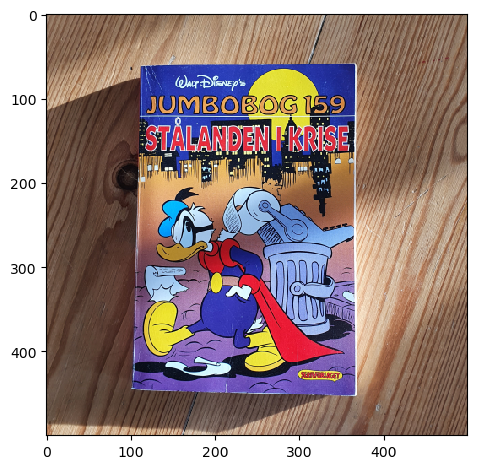

In [153]:
img_name = "donald_1.png"
img_orig = io.imread(data_dir + img_name)
io.imshow(img_orig)

In [154]:
img_gray = rgb2gray(img_orig)
h_img = prewitt_h(img_gray)
v_img = prewitt_v(img_gray)

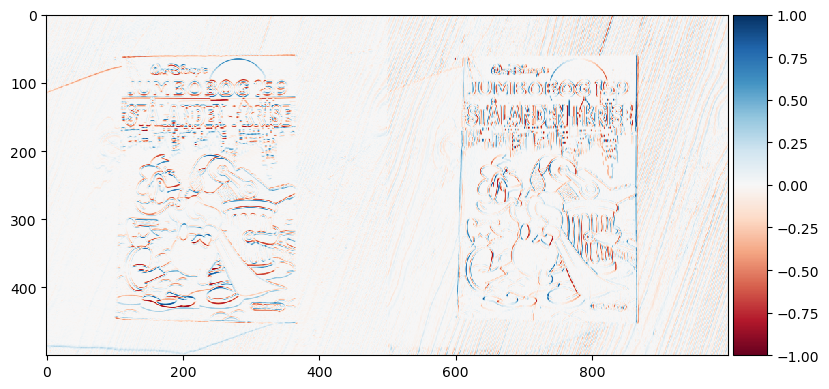

In [156]:
#increase the size of the imshow window
plt.figure(figsize = (20,4))
#The vmin and vmax parameters are used to set the range of the colorbar
#The values are then mapped / normalized to the range [0,1]
io.imshow(np.hstack((h_img, v_img)), vmin = -1, vmax = 1)

It appears that steep gradients between pixels obtain high values, light to dark becomes blue (when applying the filter from top left to bottom right) and dark to light becomes red (negative). 

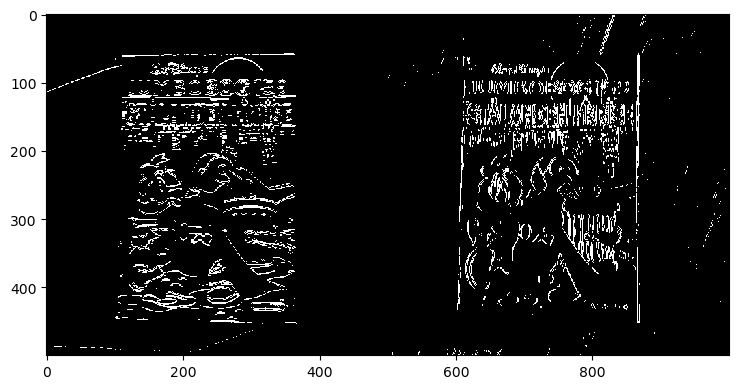

In [92]:
#Show only pixels with an absolute value greater than 0.25
#increase the size of the imshow window
plt.figure(figsize = (20,4))

io.imshow(np.hstack((np.abs(h_img) > 0.25, np.abs(v_img) > 0.25)))

### Exercise 10: Edge detection in medical images
The goal of this exercise is to detect the edges that seperates the bone from the soft tissue and the edges that separates the elbow from the background. Your detection algorithm should follow this outline:

* Read the CT image
* Filter the image using either a Gaussian filter or a median filter
* Compute the gradients in the filtered image using a Prewitt filter
* Use Otsu's thresholding method to compute a threshold, T, in the gradient image
* Apply the threshold, T, to the gradient image to create a binary image.

The final binary should contain the edges we are looking for. It will probably contain noise as well. We will explore methods to remove this noise later in the course.

You should experiment and find out:

* Does the median or Gaussian filter give the best result?
* Should you use both the median and the Gaussian filter?
* What filter size gives the best result?
* What sigma in the Gaussian filter gives the best result?

Tip: To get a better understanding of your output, uou can use the scaled visualization and colormapping that we explored in an earlier exercise:


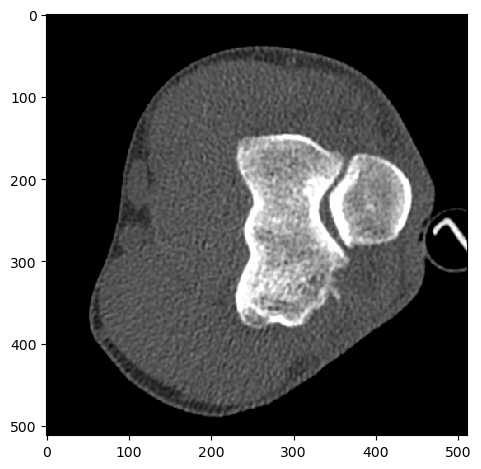

In [157]:
image_name = 'ElbowCTSlice.png'
img_orig = io.imread(data_dir + image_name)
io.imshow(img_orig)

In [100]:
#Plot the values of pixel at index 300,300
print(img_orig[300,300])

155


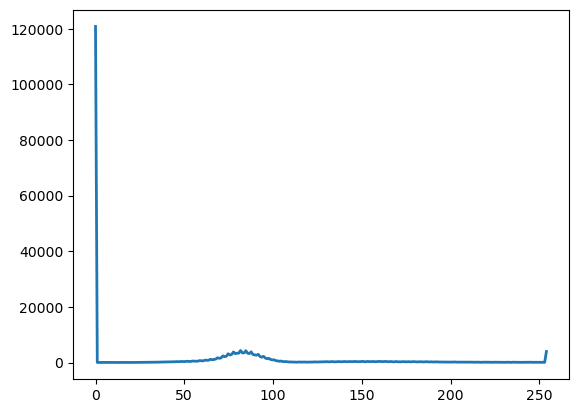

In [102]:
hist = np.histogram(img_orig, bins=256, range=(0, 255))
plt.plot(hist[1][:-1], hist[0], lw=2)
plt.show()

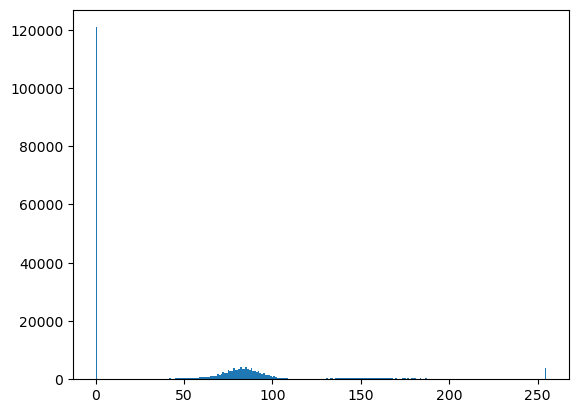

In [104]:
plt.hist(img_orig.ravel(), bins=256, range=(0, 255))
plt.show()

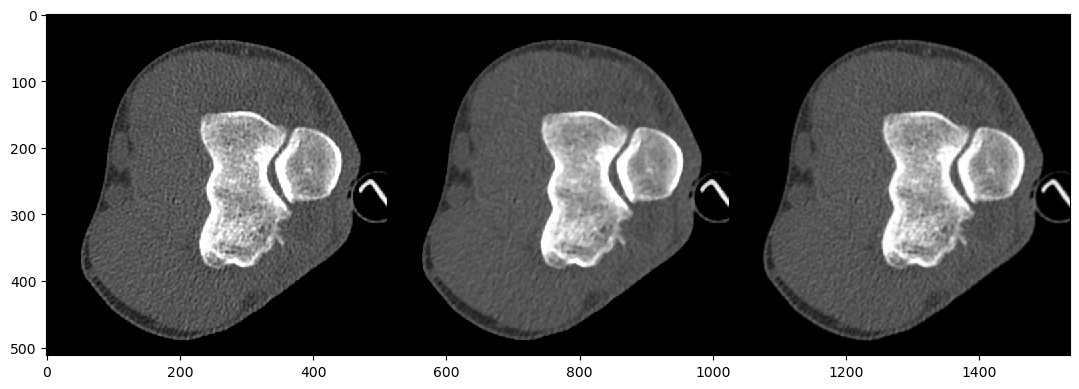

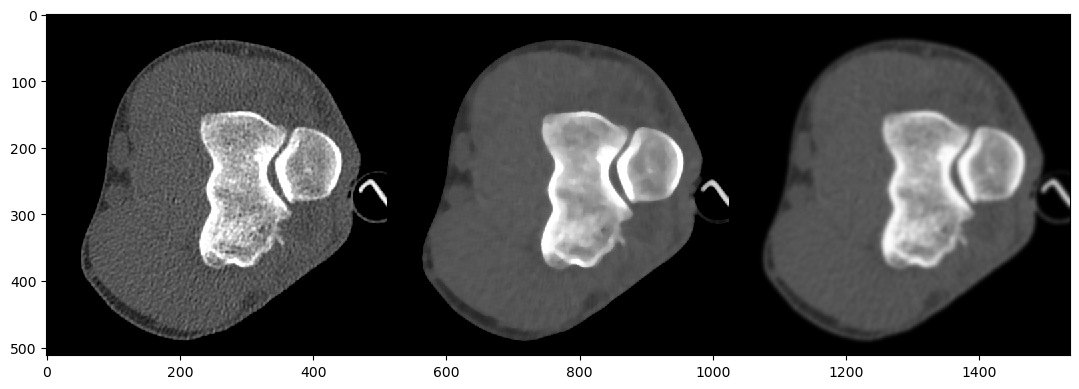

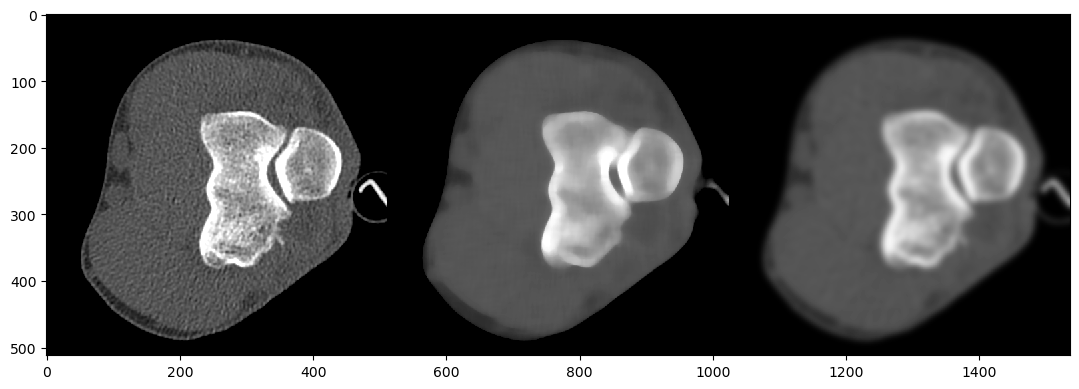

In [120]:
from skimage import filters


size = [5,10,20]
sigma = [1,3,5]
for s in zip(size,sigma):
    footprint = np.ones([s[0],s[0]])
    med_img = filters.median(img_orig, footprint)

    gauss_img = filters.gaussian(img_orig, s[1])
    #Map gauss normalized to 0-255 and convert to uint8 int np array 
    gauss_img = (gauss_img*255.0).astype(np.uint8)

    plt.figure(figsize = (20,4))
    io.imshow(np.hstack((img_orig, med_img, gauss_img)))




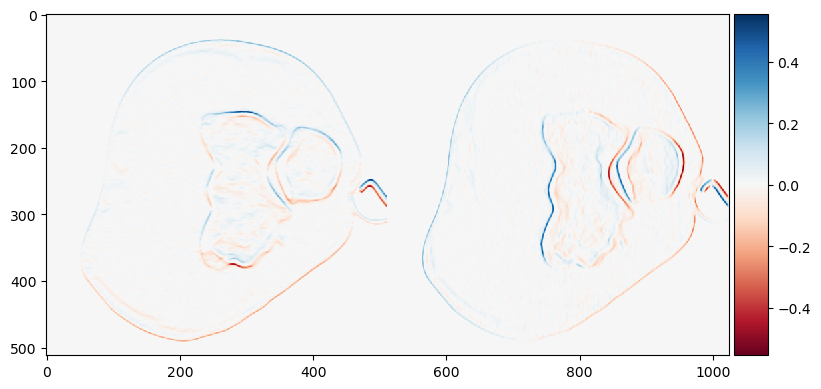

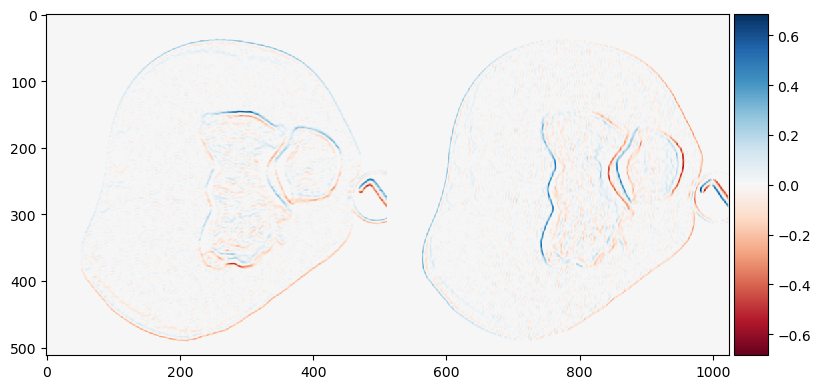

In [135]:
#Median filter at size 10 seem to capture the primary features and clearly seperate the colours, 

footprint= np.ones([10,10])
footprint2= np.ones([5,5])
img_med = filters.median(img_orig, footprint)
img_med2 = filters.median(img_orig, footprint2)
h_img = filters.prewitt_h(img_med)
h_img2 = filters.prewitt_h(img_med2)
v_img = filters.prewitt_v(img_med)
v_img2 = filters.prewitt_v(img_med2)

#Plot the 2 filters
plt.figure(figsize=(20,4))
io.imshow(np.hstack((h_img,v_img)))
plt.figure(figsize=(20,4))
io.imshow(np.hstack((h_img2,v_img2)))

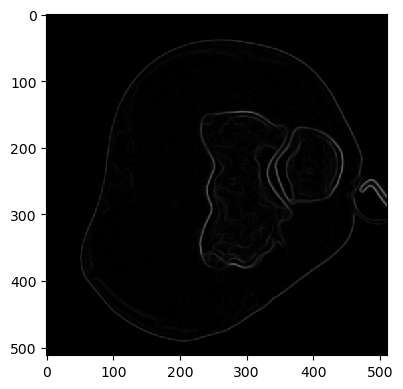

In [147]:
from skimage import io , filters
p_img = filters.prewitt(img_med)
plt.figure(figsize=(10,4))
io.imshow(p_img)

In [149]:
np.max(p_img)

0.4193461199940353

0.8196078431372549


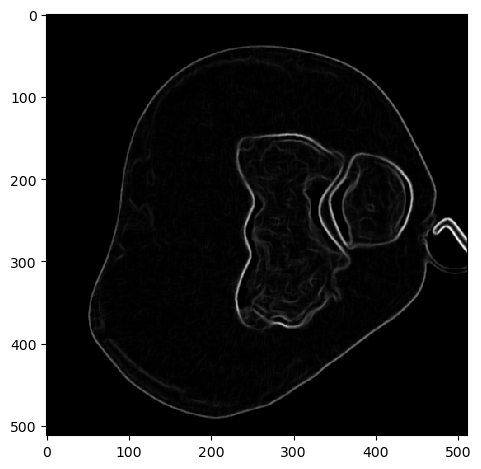

In [137]:
#Combine the vertical and horisontal prewit filters to one by adding the absolute values of the 2 and normalizing from 0-1
img_edge = (np.abs(h_img) + np.abs(v_img))
img_edge2 = (np.abs(h_img2) + np.abs(v_img2))
#max value 
print(np.max(img_edge))
#normalize values to 0-1
img_edge = img_edge / np.max(img_edge)
img_edge2 = img_edge2 / np.max(img_edge2)
io.imshow(img_edge)

In [121]:
from skimage.filters import threshold_otsu
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

def otsu_threshold(img_in):
    """
    Function to seperate foreground and background pixels in an image based on Otsu's method
    :param img_in: Input image (unsigned byte)
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    img_byte = img_as_ubyte(img_in)
    thres = threshold_otsu(img_byte)
    print('Otsu threshold value: ', thres)
    img_out = np.zeros(img_byte.shape, dtype=np.uint8)
    img_out[img_byte > thres] = 255
    return img_out

Otsu threshold value:  44
Otsu threshold value:  43


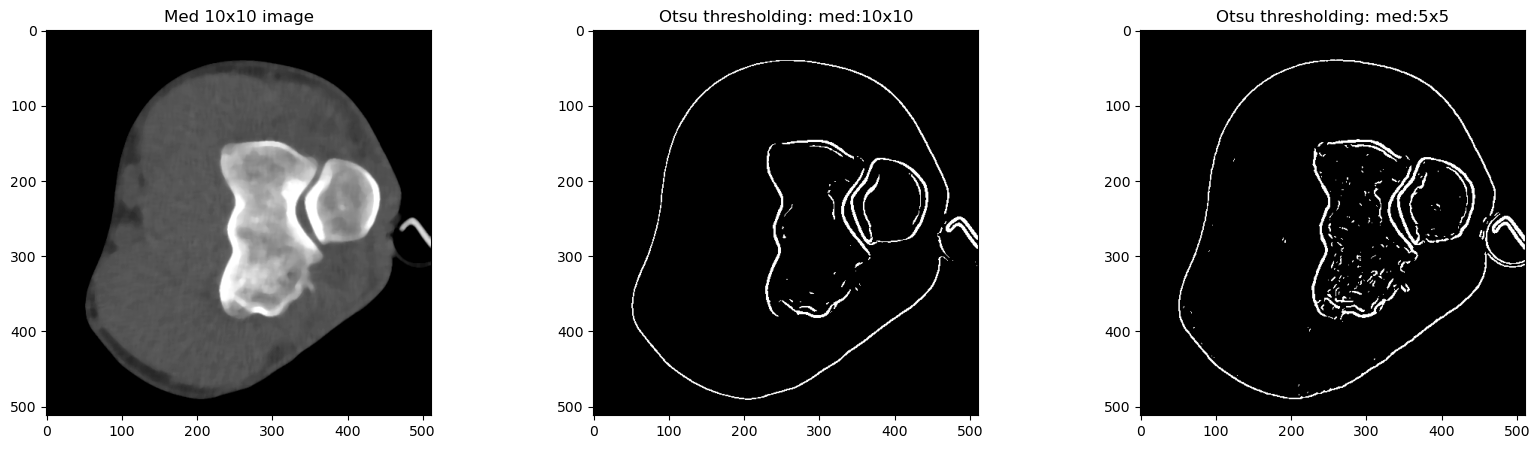

In [148]:
img_otsu = otsu_threshold(img_edge)
print(type(img_otsu))
img_otsu2 = otsu_threshold(img_edge2)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(img_med, cmap='gray')
ax[0].set_title('Med 10x10 image')
ax[1].imshow(img_otsu, cmap='gray')
ax[1].set_title('Otsu thresholding: med:10x10')
ax[2].imshow(img_otsu2, cmap='gray')
ax[2].set_title('Otsu thresholding: med:5x5')

plt.show()

### Exercise 11
Modify the process_gray_image function in the program so it performs a Prewitt filter on the input image.

Also try to make it perform the automatic edge-detection (Prewitt + Otsu) from exercise 10.

In [ ]:
#To disable median filter set flag to 0 (false, default)

In [168]:
!python data/Ex4-VideoImageFiltering.py 0

Median flag:  [False]
Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


[ WARN:0@0.027] global C:\b\abs_74oeeuevib\croots\recipe\opencv-suite_1664548340488\work\modules\videoio\src\cap_gstreamer.cpp (862) cv::GStreamerCapture::isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


Works like a charm :-)

### Exercise 12
Try to use a median filter with a size of 10 on the video stream. What happens with the frames-per-second? Why?

At size 10 my FPS drops to 1-2, with size 5 it is around 5-6. Normally it ran at 15-16 FPS.

Applying the mean filter is a computationally heavy process and slows down the speed at which images can be processed significantly, hence reducing the FPS.

In [ ]:
#To enable median filter set flag to 1 (true)
!python data/Ex4-VideoImageFiltering.py 1